## Part 1: Exploratory Analysis and Visualization

In [174]:
import numpy as np
import pandas as pd

In [175]:
# read in data file

homes_df = pd.read_csv('WestRoxbury_unprocessed.csv')
homes_df

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762.0,1938,1714.0,2.0,9,3,2,1,1,1,Recent
5798,407.9,9408.0,1950,1333.0,2.0,6,3,1,1,1,1,None
5799,406.5,7198.0,1987,1674.0,2.0,7,3,1,1,1,1,None
5800,308.7,6890.0,1946,1000.0,1.0,5,2,1,0,1,0,None


### Basic Exploratory Analysis

In [176]:
# 1. print the data types of each column
homes_df.dtypes

TOTAL_VALUE    float64
LOT_SQFT       float64
YR_BUILT         int64
LIVING_AREA    float64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object

In [177]:
# 2. print the shape of the dataframe
homes_df.shape

(5802, 12)

In [178]:
# 3. check for null values
homes_df.isnull().sum()

TOTAL_VALUE    0
LOT_SQFT       1
YR_BUILT       0
LIVING_AREA    2
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

In [179]:
# 4. look at each category in "REMODEL"
print(homes_df["REMODEL"].value_counts())

None      4346
Recent     875
Old        581
Name: REMODEL, dtype: int64


In [180]:
# 5. look at the frequency of occurence in the "ROOMS" column
print(homes_df["ROOMS"].value_counts())

7     1769
6     1669
8      936
5      578
9      450
10     200
4       71
11      66
12      45
13      10
14       5
3        3
Name: ROOMS, dtype: int64


In [181]:
predictors_df = homes_df[['LOT_SQFT', 'YR_BUILT', 'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 
              'HALF_BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL']]
response_df = homes_df['TOTAL_VALUE']

In [182]:
# 6. look at the correlation between all of the predictors (be sure to only focus on the predictors, and not the target variable)
predictors_df.corr()

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
LOT_SQFT,1.000000,-0.068903,0.426145,0.073640,0.308398,0.254094,0.201427,0.134947,0.044518,0.181910
YR_BUILT,-0.068903,1.000000,-0.131162,-0.190453,-0.144686,-0.130411,0.073706,0.060685,0.052091,0.087234
LIVING_AREA,0.426145,-0.131162,1.000000,0.475604,0.720688,0.641065,0.438143,0.300847,0.082799,0.261992
FLOORS,0.073640,-0.190453,0.475604,1.000000,0.432856,0.431242,0.112166,0.316142,-0.114602,0.120506
ROOMS,0.308398,-0.144686,0.720688,0.432856,1.000000,0.710693,0.378274,0.282655,0.129223,0.205223
BEDROOMS,0.254094,-0.130411,0.641065,0.431242,0.710693,1.000000,0.332620,0.256852,0.085353,0.164380
FULL_BATH,0.201427,0.073706,0.438143,0.112166,0.378274,0.332620,1.000000,-0.130628,0.146650,0.140160
HALF_BATH,0.134947,0.060685,0.300847,0.316142,0.282655,0.256852,-0.130628,1.000000,-0.020071,0.176234
KITCHEN,0.044518,0.052091,0.082799,-0.114602,0.129223,0.085353,0.146650,-0.020071,1.000000,-0.009562
FIREPLACE,0.181910,0.087234,0.261992,0.120506,0.205223,0.164380,0.140160,0.176234,-0.009562,1.000000


### Data visualization

In [183]:
import matplotlib.pyplot as plt

In [184]:
%matplotlib inline

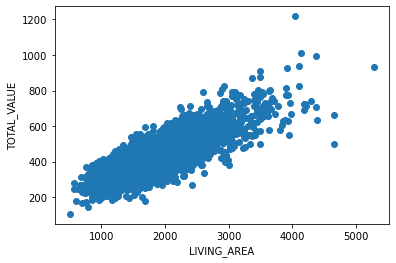

In [185]:
# plot LIVING_AREA vs. TOTAL_VALUE
plt.scatter(homes_df['LIVING_AREA'],homes_df['TOTAL_VALUE'])  
plt.xlabel("LIVING_AREA")                                    
plt.ylabel("TOTAL_VALUE")              
plt.show()

## Part 2: Data preprocessing

#### Drop predictors (if you feel it's necessary)

In [186]:
# 1.

#### Deal with NA values

In [187]:
# 2.
homes_df = homes_df.fillna(value = {"LOT_SQFT": homes_df["LOT_SQFT"].mean()})
homes_df = homes_df.fillna(value = {"LIVING_AREA": homes_df ["LIVING_AREA"].mean()})

#### Deal with categorical variables

In [188]:
# 3. flag categorical varibales
#homes_df = pd.get_dummies(homes_df, columns=['REMODEL'])
homes_df = pd.get_dummies(homes_df , drop_first = True)  
homes_df.corr()

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
TOTAL_VALUE,1.000000,0.546107,-0.100917,0.836916,0.481523,0.638539,0.561871,0.432807,0.348167,0.018265,0.358567,0.041721,0.228764
LOT_SQFT,0.546107,1.000000,-0.068903,0.426120,0.073639,0.308398,0.254093,0.201395,0.134932,0.044518,0.181906,0.022732,0.038999
YR_BUILT,-0.100917,-0.068903,1.000000,-0.131155,-0.190453,-0.144686,-0.130411,0.073706,0.060685,0.052091,0.087234,-0.064071,-0.101228
LIVING_AREA,0.836916,0.426120,-0.131155,1.000000,0.475411,0.720388,0.640636,0.438063,0.300779,0.082799,0.261948,0.045633,0.168536
FLOORS,0.481523,0.073639,-0.190453,0.475411,1.000000,0.432856,0.431242,0.112166,0.316142,-0.114602,0.120506,0.048083,0.095531
ROOMS,0.638539,0.308398,-0.144686,0.720388,0.432856,1.000000,0.710693,0.378274,0.282655,0.129223,0.205223,0.050327,0.139214
BEDROOMS,0.561871,0.254093,-0.130411,0.640636,0.431242,0.710693,1.000000,0.332620,0.256852,0.085353,0.164380,0.042266,0.121563
FULL_BATH,0.432807,0.201395,0.073706,0.438063,0.112166,0.378274,0.332620,1.000000,-0.130628,0.146650,0.140160,0.023718,0.206033
HALF_BATH,0.348167,0.134932,0.060685,0.300779,0.316142,0.282655,0.256852,-0.130628,1.000000,-0.020071,0.176234,-0.009348,0.021487
KITCHEN,0.018265,0.044518,0.052091,0.082799,-0.114602,0.129223,0.085353,0.146650,-0.020071,1.000000,-0.009562,0.023769,0.010102


#### Normalize data

In [189]:
from sklearn import preprocessing

In [190]:
# create a dataframe with just the predictors, and another with just the values for the response variable
# predictor_df should be helpful when you normalize the predictors below, and response_df should be helpful when you partition
# your data into train and test sets (hint: you can use "y = response_df" when you partition)

predictors_df1 = homes_df[['LOT_SQFT', 'YR_BUILT', 'LIVING_AREA', 'FLOORS', 'ROOMS','BEDROOMS', 'FULL_BATH', 'HALF_BATH', 
              'KITCHEN', 'FIREPLACE','REMODEL_Old', 'REMODEL_Recent']]
response_df = homes_df['TOTAL_VALUE']

In [191]:
# 4. normalize predictors using standardization (i.e., force all predictors to have mean = 0  and standard deviation = 1)
z_score_norm = preprocessing.StandardScaler()
predictor_df_normalized = z_score_norm.fit_transform(predictors_df1)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df1.columns)
predictor_df_normalized

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,1.381094,-1.576825,-0.564933,0.710966,-0.692039,-0.271806,-0.568577,0.723264,-0.124814,-1.309450,-0.333589,-0.421418
1,0.116790,0.229392,0.589953,0.710966,2.090505,0.909482,1.347151,0.723264,-0.124814,-1.309450,-0.333589,2.372943
2,0.457684,-1.298946,-0.529768,0.710966,0.699233,0.909482,-0.568577,0.723264,-0.124814,-1.309450,-0.333589,-0.421418
3,2.807603,0.562847,1.759645,-1.537005,1.394869,2.090769,-0.568577,0.723264,-0.124814,0.460275,-0.333589,-0.421418
4,-0.478838,-0.743187,-0.405766,0.710966,0.003597,-0.271806,1.347151,-1.150120,-0.124814,-1.309450,-0.333589,-0.421418
...,...,...,...,...,...,...,...,...,...,...,...,...
5797,0.181222,0.034876,0.105049,0.710966,1.394869,-0.271806,1.347151,0.723264,-0.124814,0.460275,-0.333589,2.372943
5798,1.172437,0.368332,-0.600098,0.710966,-0.692039,-0.271806,-0.568577,0.723264,-0.124814,0.460275,-0.333589,-0.421418
5799,0.344552,1.396486,0.031017,0.710966,0.003597,-0.271806,-0.568577,0.723264,-0.124814,0.460275,-0.333589,-0.421418
5800,0.229172,0.257180,-1.216407,-1.537005,-1.387675,-1.453094,-0.568577,-1.150120,-0.124814,-1.309450,-0.333589,-0.421418


In [192]:
homes_df

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,1,0,0,0
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,1,0,0,1
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,1,0,0,0
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,1,0,0
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762.0,1938,1714.0,2.0,9,3,2,1,1,1,0,1
5798,407.9,9408.0,1950,1333.0,2.0,6,3,1,1,1,1,0,0
5799,406.5,7198.0,1987,1674.0,2.0,7,3,1,1,1,1,0,0
5800,308.7,6890.0,1946,1000.0,1.0,5,2,1,0,1,0,0,0


## Part 3: Multiple Linear Regression

### First, train and test the multiple linear regression model with sklearn

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from dmba import regressionSummary, adjusted_r2_score  # using the dmba package for perforance evaluation

In [194]:
# 1. partition data into train and test sets
X = predictor_df_normalized
y = response_df
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [195]:
# 2. train the LR model
linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_y)

In [196]:
#3. print the coefficients
print('intercept ', linear_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': linear_model.coef_}))

intercept  392.82844694264617
         Predictor  coefficient
0         LOT_SQFT    25.357001
1         YR_BUILT     0.023651
2      LIVING_AREA    54.529780
3           FLOORS    12.364344
4            ROOMS     1.929909
5         BEDROOMS    -1.793882
6        FULL_BATH    10.692514
7        HALF_BATH     9.932147
8          KITCHEN    -3.984494
9        FIREPLACE    11.550007
10     REMODEL_Old     1.219271
11  REMODEL_Recent     8.787321


In [197]:
#4. print performance metrics on training set using regressionSummary()
predicted_y_training = linear_model.predict(train_X)
regressionSummary(train_y, predicted_y_training)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 44.5731
            Mean Absolute Error (MAE) : 33.8157
          Mean Percentage Error (MPE) : -1.1849
Mean Absolute Percentage Error (MAPE) : 8.8377


In [198]:
# 5. now, deploy the model on the test data
predicted_y_test = linear_model.predict(test_X)  # these are our y_hat values!!

result = pd.DataFrame({'Predicted': predicted_y_test, 'Actual': test_y,
                       'Residual': test_y - predicted_y_test})

In [199]:
# 5. how did our model perform in prediction? Use regressionSummary()
regressionSummary(test_y, predicted_y_test)


Regression statistics

                      Mean Error (ME) : -0.4757
       Root Mean Squared Error (RMSE) : 43.5041
            Mean Absolute Error (MAE) : 32.4041
          Mean Percentage Error (MPE) : -1.2012
Mean Absolute Percentage Error (MAPE) : 8.4729


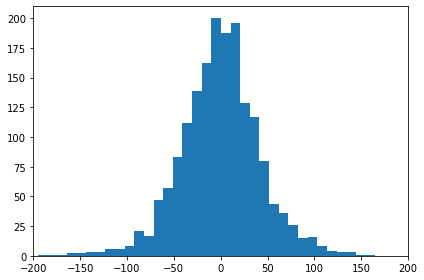

In [200]:
# 6. let's see if our residuals are normally distributed (use matplotlib for this)
residuals = test_y - predicted_y_test
plt.hist(residuals, bins = 50)
plt.xlim([-200,200])
plt.tight_layout()
plt.show()

### Now, train and test the model with statsmodels

In [201]:
import statsmodels.api as sm

In [202]:
# 7. add constant to the training and testing data (the predictors) and train model
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

linear_model2 = sm.OLS(train_y, train_X).fit()
linear_model2.params

const             392.828447
LOT_SQFT           25.357001
YR_BUILT            0.023651
LIVING_AREA        54.529780
FLOORS             12.364344
ROOMS               1.929909
BEDROOMS           -1.793882
FULL_BATH          10.692514
HALF_BATH           9.932147
KITCHEN            -3.984494
FIREPLACE          11.550007
REMODEL_Old         1.219271
REMODEL_Recent      8.787321
dtype: float64

In [203]:
#8. print the coefficients
print('intercept ', linear_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': linear_model.coef_}))

intercept  392.82844694264617
         Predictor  coefficient
0         LOT_SQFT    25.357001
1         YR_BUILT     0.023651
2      LIVING_AREA    54.529780
3           FLOORS    12.364344
4            ROOMS     1.929909
5         BEDROOMS    -1.793882
6        FULL_BATH    10.692514
7        HALF_BATH     9.932147
8          KITCHEN    -3.984494
9        FIREPLACE    11.550007
10     REMODEL_Old     1.219271
11  REMODEL_Recent     8.787321


In [204]:
# 9. now, look at the training performance
predicted_y_training2 = linear_model2.predict(train_X)
regressionSummary(train_y, predicted_y_training2)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 44.5731
            Mean Absolute Error (MAE) : 33.8157
          Mean Percentage Error (MPE) : -1.1849
Mean Absolute Percentage Error (MAPE) : 8.8377


In [205]:
# 10. now, deploy the model on the test data
predicted_y_test2 = linear_model2.predict(test_X)

In [206]:
# 10. look at the testing performance
regressionSummary(test_y, predicted_y_test2)


Regression statistics

                      Mean Error (ME) : -0.4757
       Root Mean Squared Error (RMSE) : 43.5041
            Mean Absolute Error (MAE) : 32.4041
          Mean Percentage Error (MPE) : -1.2012
Mean Absolute Percentage Error (MAPE) : 8.4729


In [207]:
# 11. look at the p-values
print(linear_model2.pvalues.round(4))

const             0.0000
LOT_SQFT          0.0000
YR_BUILT          0.9719
LIVING_AREA       0.0000
FLOORS            0.0000
ROOMS             0.0939
BEDROOMS          0.0824
FULL_BATH         0.0000
HALF_BATH         0.0000
KITCHEN           0.0000
FIREPLACE         0.0000
REMODEL_Old       0.0912
REMODEL_Recent    0.0000
dtype: float64


In [208]:
# 12. drop the variables that are not significant (i.e., p>0.05)
train_X = train_X.drop(["YR_BUILT","ROOMS","BEDROOMS","REMODEL_Old"], axis = 1)
test_X = test_X.drop(["YR_BUILT","ROOMS","BEDROOMS","REMODEL_Old"], axis = 1)

In [209]:
# 13. train the new model and print the performance metrics for training
linear_model3 = sm.OLS(train_y, train_X).fit()
predicted_y_training3 = linear_model3.predict(train_X)
regressionSummary(train_y, predicted_y_training3)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.6115
            Mean Absolute Error (MAE) : 33.8527
          Mean Percentage Error (MPE) : -1.1889
Mean Absolute Percentage Error (MAPE) : 8.8513


In [210]:
# 14. deploy the model on the test data, and print the performance metrics for testing
predicted_y_test3 = linear_model3.predict(test_X)
regressionSummary(test_y, predicted_y_test3)


Regression statistics

                      Mean Error (ME) : -0.4734
       Root Mean Squared Error (RMSE) : 43.5439
            Mean Absolute Error (MAE) : 32.4012
          Mean Percentage Error (MPE) : -1.2083
Mean Absolute Percentage Error (MAPE) : 8.4755
